In [130]:
import pandas as pd
import numpy as np
import seaborn as sn

In [131]:
df = pd.read_excel('Heights.xlsx')
df

,Name,Height
0,Rob,6.2
1,Thomas,5.7
2,Nina,4.6
3,Mittal,5.4
4,Sofia,5.9
5,Mohan,4.3
6,Tao,5.1
7,Deepika,5.2
8,Rafik,4.9
9,Smith,9.0


In [132]:
df.Height.describe()

count    10.00000
mean      5.63000
std       1.31829
min       4.30000
25%       4.95000
50%       5.30000
75%       5.85000
max       9.00000
Name: Height, dtype: float64

In [133]:
mean = df.Height.mean()
mean

5.63

In [134]:
median = df.Height.median()
median

5.300000000000001

In [135]:
std = df.Height.std()
std

1.3182901383568373

<AxesSubplot: xlabel='Height', ylabel='Count'>

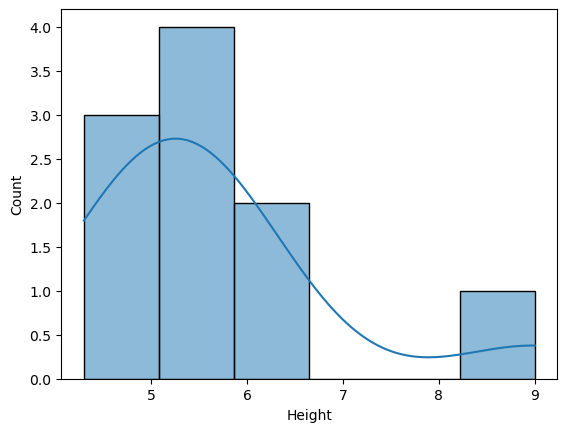

In [136]:
sn.histplot(df.Height, kde=True)

### OUTLIER REMOVAL

In [137]:
mean - 3*std

1.675129584929488

In [138]:
mean + 3*std

9.584870415070512

In [139]:
mean - 2*std

2.9934197232863253

In [140]:
mean + 2*std

8.266580276713675

In [141]:
mean - 1*std

4.311709861643163

In [142]:
mean + 1*std

6.948290138356837

In [143]:
df[df.Height>6.9483]

,Name,Height
9,Smith,9.0


In [144]:
df[(df.Height>8.26658) | (df.Height<2.99341)]   ##+2 and -2 std used

,Name,Height
9,Smith,9.0


In [145]:
df_no_outlier = df[(df.Height<8.26658) & (df.Height>2.99341)]

In [146]:
df_no_outlier

,Name,Height
0,Rob,6.2
1,Thomas,5.7
2,Nina,4.6
3,Mittal,5.4
4,Sofia,5.9
5,Mohan,4.3
6,Tao,5.1
7,Deepika,5.2
8,Rafik,4.9


In [147]:
df_no_outlier = df[~(df.Height>8.26658) | (df.Height<2.99341)]    ## Another method but same result as above
df_no_outlier

,Name,Height
0,Rob,6.2
1,Thomas,5.7
2,Nina,4.6
3,Mittal,5.4
4,Sofia,5.9
5,Mohan,4.3
6,Tao,5.1
7,Deepika,5.2
8,Rafik,4.9


<AxesSubplot: xlabel='Height', ylabel='Count'>

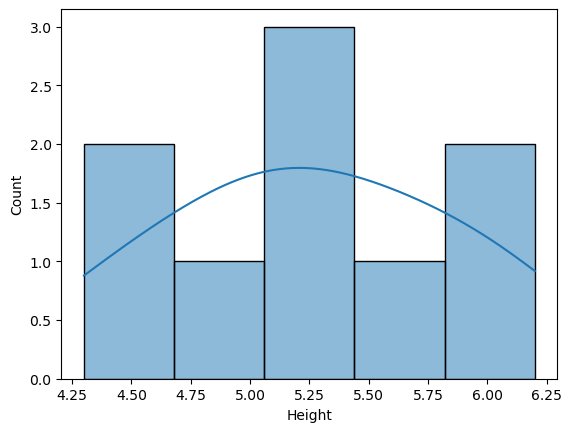

In [148]:
sn.histplot(df_no_outlier.Height, kde=True)

In [149]:
df_no_outlier.shape

(9, 2)

In [150]:
df.shape

(10, 2)

### Z SCORE

In [151]:
## Z Score is how many STD away a DATAPOINT is from MEAN. Z = (Height(x)-mean)/std

In [152]:
df['zscore'] = (df.Height-df.Height.mean())/df.Height.std()
df.head(10)

,Name,Height,zscore
0,Rob,6.2,0.432378
1,Thomas,5.7,0.053099
2,Nina,4.6,-0.781315
3,Mittal,5.4,-0.174468
4,Sofia,5.9,0.204811
5,Mohan,4.3,-1.008883
6,Tao,5.1,-0.402036
7,Deepika,5.2,-0.326180
8,Rafik,4.9,-0.553748
9,Smith,9.0,2.556342


In [153]:
df[df.zscore>2]

,Name,Height,zscore
9,Smith,9.0,2.556342


In [154]:
df[df.zscore<-2]

,Name,Height,zscore


In [155]:
df[(df.zscore<-2) | (df.zscore>2)]

,Name,Height,zscore
9,Smith,9.0,2.556342


In [156]:
df_no_outlier = df[~(df.zscore>2) | (df.zscore<-2)]    ## +2 and -2 Z-score used
df_no_outlier

,Name,Height,zscore
0,Rob,6.2,0.432378
1,Thomas,5.7,0.053099
2,Nina,4.6,-0.781315
3,Mittal,5.4,-0.174468
4,Sofia,5.9,0.204811
5,Mohan,4.3,-1.008883
6,Tao,5.1,-0.402036
7,Deepika,5.2,-0.326180
8,Rafik,4.9,-0.553748
